# WeatherPy
----

### Monteiro analysis
* As expected, the weather becomes warmer as one approaches the equator (0 Deg. Latitude), and as we are close to the Spring Equinox, we would anticipate that the Southern Latitudes are warmer than the Northern Latitudes at this time of year. 
* There is no strong relationship between latitude and cloudiness. Considering that the data seems to cluster around certain y-values, it's my guess that most scientists estimate the value on a categorical scale [0, 25, 50, 75, 100]
* There is no strong relationship between latitude and wind speed. Possibly with a larger dataset there might be more definition to a curve that looks somewhat like the inverse of the temperature curve (that is, where it is cooler, there is a greater chance of higher wind, so it is more likely to be windy the farther you are from the Equator). But for now we probably can't say anything definitive..

In [4]:
# Actions in terminal before we begin

# pip install citipy
# add Weather Map api_key to config

# Dependencies and Setup
import openweathermapy.core as owm
import matplotlib.pyplot as plt
import json
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        city = city.title()
        cities.append(city)

# Print the city count to confirm sufficient count
# Do we need to make city names Capitalized?
print(cities)



['Irimbo', 'Mataram', 'Albany', 'Sentyabrskiy', 'Lompoc', 'Port Elizabeth', 'Pasni', 'Turukhansk', 'Jamestown', 'Coquimbo', 'Acapulco', 'Derby', 'East London', 'Taolanaro', 'Belushya Guba', 'Albany', 'Fano', 'Saint George', 'Vao', 'Souillac', 'Barentsburg', 'Bluff', 'Chupaca', 'Kapaa', 'Barrow', 'Bridlington', 'Dolores', 'Ostersund', 'Muisne', 'Port Alfred', 'Cabo San Lucas', 'Mataura', 'Vanino', 'Castro', 'Rikitea', 'Busselton', 'Ushuaia', 'Tsihombe', 'Belushya Guba', 'Port Alfred', 'Atuona', 'Chuy', 'Attawapiskat', 'Coihaique', 'Bengkulu', 'Camacha', 'Richards Bay', 'Faanui', 'Sorland', 'Victoria', 'Karratha', 'Miranorte', 'Mataura', 'Hermanus', 'Hobart', 'Altay', 'Nizhneyansk', 'Karkaralinsk', 'Hambantota', 'Mkushi', 'Petropavlovsk-Kamchatskiy', 'Pevek', 'Rockland', 'Albany', 'Butaritari', 'Attawapiskat', 'Mataura', 'Paciran', 'Sao Joao Da Barra', 'Jamestown', 'Banjar', 'Rabat', 'Muzhi', 'Bandar', 'Amderma', 'Chuy', 'Albany', 'Saint-Augustin', 'Taoudenni', 'Atuona', 'Puerto Ayora', 

In [6]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="
query_url


'http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q='

In [4]:
city = []
lat = []
lon = []
temp_f = []
humidity = []
cloudiness = []
wind_mph = []

print(f'Begin Data Retrival: Print Processing Record, City, & API URL')
print('______________________________________________________________')
print('')

record = 0
setnum = 1

for city in cities:
    
    if (record > 50):
        record = 0
        setnum = setnum + 1
        
    print(f'Processing Record {record}; Set #{setnum} | {city}')
    record = record + 1
    #city = city.replace(' .', '%20', n=-1, case=None, flags=0, regex=True)
    city_url = query_url + city.replace(" ", "%20")
    print(city_url)
    
    response = requests.get(query_url + city).json()
    
    if response['cod'] == 200: #checks if response is sucessfull, if other than 200, skip code below
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp_f.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_mph.append(response['wind']['speed'])

Begin Data Retrival: Print Processing Record, City, & API URL
______________________________________________________________

Processing Record 0; Set #1 | Pevek
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Pevek
Processing Record 1; Set #1 | Mataura
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Mataura
Processing Record 2; Set #1 | Portland
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Portland
Processing Record 3; Set #1 | Hovd
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Hovd
Processing Record 4; Set #1 | Karpogory
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Karpogory
Processing Record 5; Set #1 | Namibe
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=impe

Processing Record 3; Set #2 | Cabo San Lucas
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Cabo%20San%20Lucas
Processing Record 4; Set #2 | Miranorte
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Miranorte
Processing Record 5; Set #2 | Lolua
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Lolua
Processing Record 6; Set #2 | Green River
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Green%20River
Processing Record 7; Set #2 | Tongchuan
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Tongchuan
Processing Record 8; Set #2 | Taolanaro
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Taolanaro
Processing Record 9; Set #2 | Lebu
http://api.openweathermap.org/data/

Processing Record 7; Set #3 | Rikitea
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Rikitea
Processing Record 8; Set #3 | Busselton
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Busselton
Processing Record 9; Set #3 | Iznik
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Iznik
Processing Record 10; Set #3 | Mar Del Plata
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Mar%20Del%20Plata
Processing Record 11; Set #3 | Hithadhoo
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Hithadhoo
Processing Record 12; Set #3 | Mys Shmidta
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Mys%20Shmidta
Processing Record 13; Set #3 | Atuona
http://api.openweathermap.org/data/

Processing Record 11; Set #4 | Chuy
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Chuy
Processing Record 12; Set #4 | Katsuura
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Katsuura
Processing Record 13; Set #4 | Ambilobe
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Ambilobe
Processing Record 14; Set #4 | Cayenne
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Cayenne
Processing Record 15; Set #4 | Bafq
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Bafq
Processing Record 16; Set #4 | Kodiak
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Kodiak
Processing Record 17; Set #4 | Tsihombe
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf53

Processing Record 14; Set #5 | Cape Town
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Cape%20Town
Processing Record 15; Set #5 | Yellowknife
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Yellowknife
Processing Record 16; Set #5 | Faanui
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Faanui
Processing Record 17; Set #5 | Qaanaaq
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Qaanaaq
Processing Record 18; Set #5 | Vaini
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Vaini
Processing Record 19; Set #5 | Vieux-Habitants
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Vieux-Habitants
Processing Record 20; Set #5 | Kapaa
http://api.openweathermap.org/data/2.5/

Processing Record 20; Set #6 | Punta Arenas
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Punta%20Arenas
Processing Record 21; Set #6 | Halalo
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Halalo
Processing Record 22; Set #6 | Naantali
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Naantali
Processing Record 23; Set #6 | Mataura
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Mataura
Processing Record 24; Set #6 | Taolanaro
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Taolanaro
Processing Record 25; Set #6 | Zhigansk
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Zhigansk
Processing Record 26; Set #6 | Tuatapere
http://api.openweathermap.org/data/2.5/we

Processing Record 24; Set #7 | Otradnoye
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Otradnoye
Processing Record 25; Set #7 | Solwezi
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Solwezi
Processing Record 26; Set #7 | Port Alfred
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Port%20Alfred
Processing Record 27; Set #7 | Cape Town
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Cape%20Town
Processing Record 28; Set #7 | Punta Arenas
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Punta%20Arenas
Processing Record 29; Set #7 | Mataura
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Mataura
Processing Record 30; Set #7 | Vaini
http://api.openweathermap.org/d

Processing Record 27; Set #8 | Ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Ushuaia
Processing Record 28; Set #8 | Butaritari
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Butaritari
Processing Record 29; Set #8 | Mataura
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Mataura
Processing Record 30; Set #8 | Leningradskiy
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Leningradskiy
Processing Record 31; Set #8 | Taolanaro
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Taolanaro
Processing Record 32; Set #8 | Punta Arenas
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Punta%20Arenas
Processing Record 33; Set #8 | Ancud
http://api.openweathermap.org

Processing Record 33; Set #9 | Puerto Ayora
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Puerto%20Ayora
Processing Record 34; Set #9 | Thompson
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Thompson
Processing Record 35; Set #9 | Christchurch
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Christchurch
Processing Record 36; Set #9 | San Patricio
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=San%20Patricio
Processing Record 37; Set #9 | Airai
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Airai
Processing Record 38; Set #9 | Kapaa
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Kapaa
Processing Record 39; Set #9 | Ouadda
http://api.openweathermap.org/data

Processing Record 36; Set #10 | Codrington
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Codrington
Processing Record 37; Set #10 | Talnakh
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Talnakh
Processing Record 38; Set #10 | Guerrero Negro
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Guerrero%20Negro
Processing Record 39; Set #10 | Mataura
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Mataura
Processing Record 40; Set #10 | Bolgatanga
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Bolgatanga
Processing Record 41; Set #10 | Attawapiskat
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Attawapiskat
Processing Record 42; Set #10 | Yellowknife
http://api.o

Processing Record 42; Set #11 | Novoagansk
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Novoagansk
Processing Record 43; Set #11 | Busselton
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Busselton
Processing Record 44; Set #11 | Nikolskoye
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Nikolskoye
Processing Record 45; Set #11 | Hermanus
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Hermanus
Processing Record 46; Set #11 | Ulaangom
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Ulaangom
Processing Record 47; Set #11 | Mount Isa
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Mount%20Isa
Processing Record 48; Set #11 | Huarmey
http://api.openweathermap.or

Processing Record 45; Set #12 | Longyearbyen
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Longyearbyen
Processing Record 46; Set #12 | Taoudenni
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Taoudenni
Processing Record 47; Set #12 | Thompson
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Thompson
Processing Record 48; Set #12 | Mar Del Plata
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Mar%20Del%20Plata
Processing Record 49; Set #12 | Saskylakh
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Saskylakh
Processing Record 50; Set #12 | Arraial Do Cabo
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Arraial%20Do%20Cabo
Processing Record 0; Set #13 | Furano


Processing Record 50; Set #13 | Bredasdorp
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Bredasdorp
Processing Record 0; Set #14 | Albany
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Albany
Processing Record 1; Set #14 | Bam
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Bam
Processing Record 2; Set #14 | Jibuti
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Jibuti
Processing Record 3; Set #14 | Lima
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Lima
Processing Record 4; Set #14 | Mao
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Mao
Processing Record 5; Set #14 | Alofi
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953

Processing Record 3; Set #15 | Taltal
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Taltal
Processing Record 4; Set #15 | Mar Del Plata
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Mar%20Del%20Plata
Processing Record 5; Set #15 | Port Lincoln
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Port%20Lincoln
Processing Record 6; Set #15 | Mataura
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Mataura
Processing Record 7; Set #15 | Djambala
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Djambala
Processing Record 8; Set #15 | Jamestown
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Jamestown
Processing Record 9; Set #15 | Punta Arenas
http://api.openweatherma

Processing Record 6; Set #16 | Chalons-En-Champagne
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Chalons-En-Champagne
Processing Record 7; Set #16 | Russell
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Russell
Processing Record 8; Set #16 | Qaanaaq
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Qaanaaq
Processing Record 9; Set #16 | Busselton
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Busselton
Processing Record 10; Set #16 | Hofn
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Hofn
Processing Record 11; Set #16 | Albany
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Albany
Processing Record 12; Set #16 | Cape Town
http://api.openweathermap.org/data

Processing Record 10; Set #17 | Lagoa
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Lagoa
Processing Record 11; Set #17 | Alyangula
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Alyangula
Processing Record 12; Set #17 | Torbay
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Torbay
Processing Record 13; Set #17 | Rikitea
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Rikitea
Processing Record 14; Set #17 | Srandakan
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Srandakan
Processing Record 15; Set #17 | Karkaralinsk
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Karkaralinsk
Processing Record 16; Set #17 | Norman Wells
http://api.openweathermap.org/data/2.

Processing Record 15; Set #18 | Ribeira Grande
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Ribeira%20Grande
Processing Record 16; Set #18 | Port Elizabeth
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Port%20Elizabeth
Processing Record 17; Set #18 | Yibin
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Yibin
Processing Record 18; Set #18 | Albany
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Albany
Processing Record 19; Set #18 | Alotau
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Alotau
Processing Record 20; Set #18 | Airai
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Airai
Processing Record 21; Set #18 | Vaini
http://api.openweathermap.org/data/2

Processing Record 18; Set #19 | Hofn
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Hofn
Processing Record 19; Set #19 | Bandarbeyla
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Bandarbeyla
Processing Record 20; Set #19 | Ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Ushuaia
Processing Record 21; Set #19 | Chokurdakh
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Chokurdakh
Processing Record 22; Set #19 | Viedma
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Viedma
Processing Record 23; Set #19 | Sept-Iles
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Sept-Iles
Processing Record 24; Set #19 | Vaini
http://api.openweathermap.org/data/2.5/weather

Processing Record 21; Set #20 | Hithadhoo
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Hithadhoo
Processing Record 22; Set #20 | Albany
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Albany
Processing Record 23; Set #20 | Yulara
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Yulara
Processing Record 24; Set #20 | Ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Ushuaia
Processing Record 25; Set #20 | Mahebourg
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Mahebourg
Processing Record 26; Set #20 | La Ronge
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=La%20Ronge
Processing Record 27; Set #20 | Rikitea
http://api.openweathermap.org/data/2.5/weather

Processing Record 26; Set #21 | Bluff
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Bluff
Processing Record 27; Set #21 | Rikitea
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Rikitea
Processing Record 28; Set #21 | Rikitea
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Rikitea
Processing Record 29; Set #21 | Adrar
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Adrar
Processing Record 30; Set #21 | Arraial Do Cabo
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Arraial%20Do%20Cabo
Processing Record 31; Set #21 | Newark
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Newark
Processing Record 32; Set #21 | Tamala
http://api.openweathermap.org/data/2.5/weathe

Processing Record 28; Set #22 | Atuona
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Atuona
Processing Record 29; Set #22 | Busselton
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Busselton
Processing Record 30; Set #22 | Twentynine Palms
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Twentynine%20Palms
Processing Record 31; Set #22 | Hermanus
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Hermanus
Processing Record 32; Set #22 | Hobart
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Hobart
Processing Record 33; Set #22 | Pathein
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Pathein
Processing Record 34; Set #22 | Vao
http://api.openweathermap.org/data/2

Processing Record 31; Set #23 | Grand River South East
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Grand%20River%20South%20East
Processing Record 32; Set #23 | Bengkulu
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Bengkulu
Processing Record 33; Set #23 | Emerald
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Emerald
Processing Record 34; Set #23 | Lebu
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Lebu
Processing Record 35; Set #23 | Jamestown
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Jamestown
Processing Record 36; Set #23 | Jamestown
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Jamestown
Processing Record 37; Set #23 | Rocha
http://api.openw

Processing Record 36; Set #24 | Atuona
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Atuona
Processing Record 37; Set #24 | Salcininkai
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Salcininkai
Processing Record 38; Set #24 | Mbekenyera
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Mbekenyera
Processing Record 39; Set #24 | Mataura
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Mataura
Processing Record 40; Set #24 | Hilo
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Hilo
Processing Record 41; Set #24 | Saint-Philippe
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Saint-Philippe
Processing Record 42; Set #24 | Batagay-Alyta
http://api.openweathermap.or

Processing Record 43; Set #25 | Humaita
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Humaita
Processing Record 44; Set #25 | Formosa
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Formosa
Processing Record 45; Set #25 | Ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Ushuaia
Processing Record 46; Set #25 | East London
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=East%20London
Processing Record 47; Set #25 | Illoqqortoormiut
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Illoqqortoormiut
Processing Record 48; Set #25 | Nikolskoye
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Nikolskoye
Processing Record 49; Set #25 | Nador
http://api.openweather

Processing Record 46; Set #26 | Salamanca
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Salamanca
Processing Record 47; Set #26 | Tiksi
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Tiksi
Processing Record 48; Set #26 | Zhanatas
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Zhanatas
Processing Record 49; Set #26 | Vieques
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Vieques
Processing Record 50; Set #26 | Jamestown
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Jamestown
Processing Record 0; Set #27 | Ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Ushuaia
Processing Record 1; Set #27 | Punta Arenas
http://api.openweathermap.org/data/2.5/weathe

Processing Record 49; Set #27 | Tuatapere
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Tuatapere
Processing Record 50; Set #27 | Mossendjo
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Mossendjo
Processing Record 0; Set #28 | Bluff
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Bluff
Processing Record 1; Set #28 | Avarua
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Avarua
Processing Record 2; Set #28 | Puerto Ayora
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Puerto%20Ayora
Processing Record 3; Set #28 | Jumla
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Jumla
Processing Record 4; Set #28 | Verkhnevilyuysk
http://api.openweathermap.org/data/2.5/we

Processing Record 1; Set #29 | Yar-Sale
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Yar-Sale
Processing Record 2; Set #29 | Ribeira Grande
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Ribeira%20Grande
Processing Record 3; Set #29 | Saint-Pierre
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Saint-Pierre
Processing Record 4; Set #29 | Mataura
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Mataura
Processing Record 5; Set #29 | Kapaa
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Kapaa
Processing Record 6; Set #29 | Griffith
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Griffith
Processing Record 7; Set #29 | Taolanaro
http://api.openweathermap.org/dat

Processing Record 3; Set #30 | Rikitea
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Rikitea
Processing Record 4; Set #30 | Ribeira Grande
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Ribeira%20Grande
Processing Record 5; Set #30 | Cape Town
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Cape%20Town
Processing Record 6; Set #30 | Busselton
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Busselton
Processing Record 7; Set #30 | Hobart
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Hobart
Processing Record 8; Set #30 | Jamestown
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Jamestown
Processing Record 9; Set #30 | Rikitea
http://api.openweathermap.org/dat

In [5]:
print(len(cities))
print(len(lat))
print(len(lon))
print(len(temp_f))
print(len(humidity))
print(len(cloudiness))
print(len(wind_mph))

1500
1379
1379
1379
1379
1379
1379


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_dict = {
    "City": cities,
    "Temp_Farenheit": temp_f,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Windspeed": wind_mph,
    "Latitude": lat,
    "Longitude": lon,
}


weather_data = pd.DataFrame.from_dict(weather_dict, orient='index')
weather_report = weather_data.transpose()
weather_format = weather_data.transpose()
weather_format = weather_format.dropna(axis = 0, how ='any')
weather_format['Temp_Farenheit'] = weather_format['Temp_Farenheit'].map("{:,.2f}".format)
weather_format['Humidity'] = weather_format['Humidity'].map("{:,.2f}%".format)
weather_format['Cloudiness'] = weather_format['Cloudiness'].map("{:,.2f}%".format)
weather_format['Windspeed'] = weather_format['Windspeed'].map("{:,.2f}".format)
weather_format.index += 1 

print(f'The final data set is #{len(weather_format)} observations. Here are the first 10. See the csv file for the full set.')
print('')
weather_format.to_csv('report_files/cities_weather.csv')
weather_format.head(10)

The final data set is #1379 observations. Here are the first 10. See the csv file for the full set.



,City,Temp_Farenheit,Humidity,Cloudiness,Windspeed,Latitude,Longitude
1,Pevek,8.45,81.00%,0.00%,2.73,69.7,170.27
2,Mataura,55.00,68.00%,24.00%,8.01,-46.19,168.86
3,Portland,67.41,32.00%,75.00%,6.93,45.52,-122.67
4,Hovd,30.81,86.00%,75.00%,21.92,63.83,10.7
5,Karpogory,20.15,85.00%,0.00%,2.62,64,44.44
6,Namibe,77.93,100.00%,0.00%,6.98,-15.19,12.15
7,Katsuura,44.58,61.00%,40.00%,16.11,33.93,134.5
8,Cidreira,69.83,95.00%,32.00%,1.39,-30.17,-50.22
9,Punta Arenas,55.18,62.00%,75.00%,17.22,-53.16,-70.91
10,Kapaa,78.96,88.00%,40.00%,11.41,22.08,-159.32


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

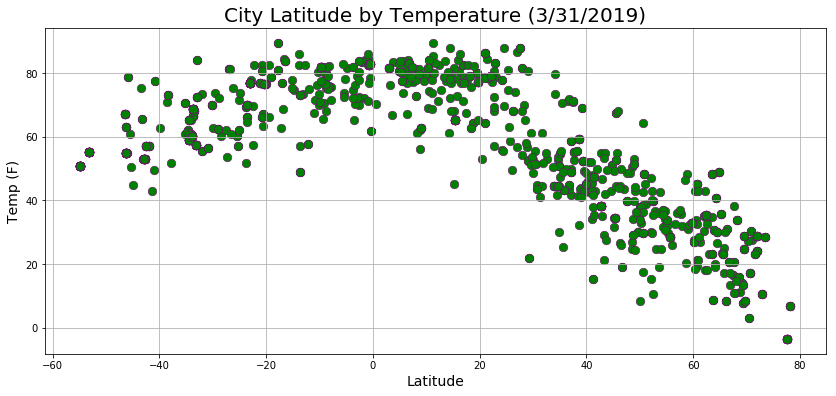

In [12]:
weather_format['Latitude'] = pd.to_numeric(weather_format['Latitude'])
weather_format['Temp_Farenheit'] = pd.to_numeric(weather_format['Temp_Farenheit'])
weather_format['Humidity'] = weather_format['Humidity'].replace("%", "")


weather_format.plot(kind='scatter', x='Latitude', y='Temp_Farenheit', 
                    marker="o", grid=True, figsize=(14,6), linewidths = 0.50, 
                    edgecolors='purple', color='green', s=75,)

plt.title("City Latitude by Temperature (3/31/2019)", fontsize=20)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Temp (F)", fontsize=14)
plt.savefig('report_files/latitude_temp.png', dpi=None, transparent=False,)
plt.show()



#### Latitude vs. Humidity Plot

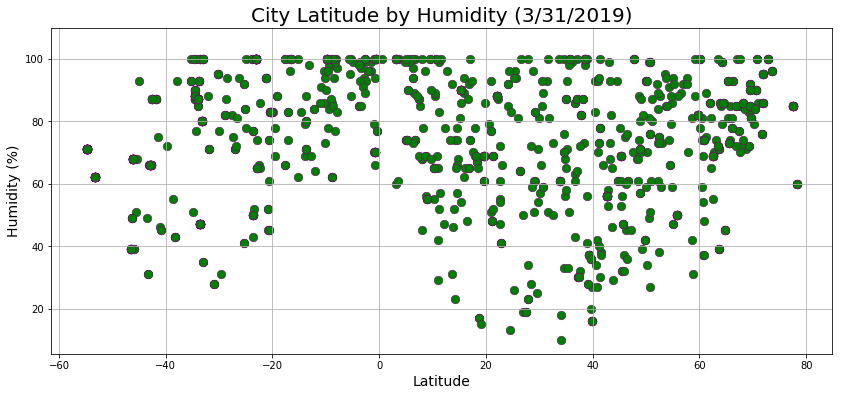

In [13]:
weather_report['Latitude'] = pd.to_numeric(weather_report['Latitude'])
weather_report['Humidity'] = pd.to_numeric(weather_report['Humidity'])

weather_report.plot(kind='scatter', x='Latitude', y='Humidity', 
                    marker="o", grid=True, figsize=(14,6), linewidths = 0.50, 
                    edgecolors='purple', color='green', s=75,)

plt.title("City Latitude by Humidity (3/31/2019)", fontsize=20)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Humidity (%)", fontsize=14)
plt.ylim(top=110)
plt.savefig('report_files/latitude_humid.png', dpi=None, transparent=False,)
plt.show()



#### Latitude vs. Cloudiness Plot

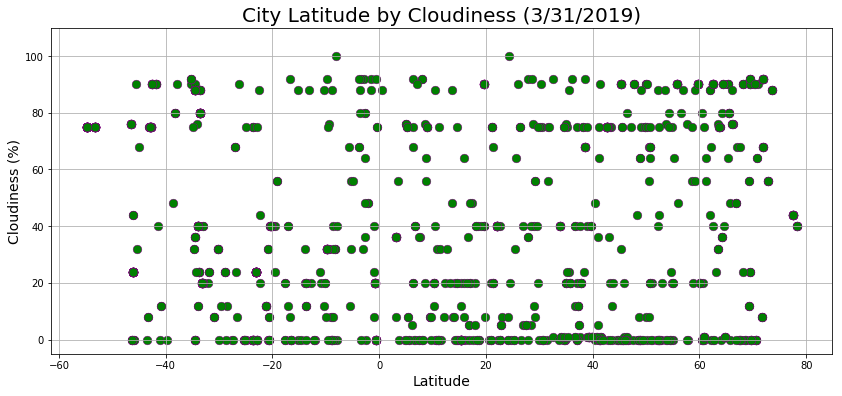

In [14]:
weather_report['Latitude'] = pd.to_numeric(weather_report['Latitude'])
weather_report['Cloudiness'] = pd.to_numeric(weather_report['Cloudiness'])

weather_report.plot(kind='scatter', x='Latitude', y='Cloudiness', 
                    marker="o", grid=True, figsize=(14,6), linewidths = 0.50, 
                    edgecolors='purple', color='green', s=75,)

plt.title("City Latitude by Cloudiness (3/31/2019)", fontsize=20)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Cloudiness (%)", fontsize=14)
plt.ylim(top=110)
plt.savefig('report_files/latitude_cloud.png', dpi=None, transparent=False,)
plt.show()



#### Latitude vs. Wind Speed Plot

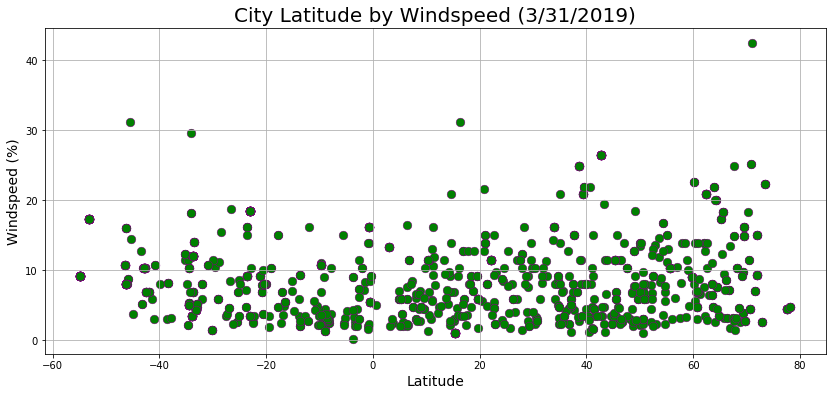

In [15]:
weather_report['Latitude'] = pd.to_numeric(weather_report['Latitude'])
weather_report['Windspeed'] = pd.to_numeric(weather_report['Windspeed'])

weather_report.plot(kind='scatter', x='Latitude', y='Windspeed', 
                    marker="o", grid=True, figsize=(14,6), linewidths = 0.50, 
                    edgecolors='purple', color='green', s=75,)

plt.title("City Latitude by Windspeed (3/31/2019)", fontsize=20)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Windspeed (%)", fontsize=14)
plt.savefig('report_files/latitude_wind.png', dpi=None, transparent=False,)
plt.show()

